# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** Fico Sibagariang
- **Email:** sibagariangfico@gmail.com
- **ID Dicoding:** MC319D5Y0712

## Menentukan Pertanyaan Bisnis

- Pada jam berapa penyewaan sepeda mencapai puncaknya dan kapan periode terendah dalam sehari?
- Seberapa besar pengaruh musim terhadap permintaan penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [970]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [971]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [972]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [973]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [974]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Tidak terdapat missing value

In [975]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [976]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [977]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [978]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [979]:
full_outer_df = pd.merge(
    day_df,
    hour_df,
    how='outer',
)
full_outer_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16,0.0
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
2,2,2011-01-01,1,0,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40,1.0
3,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
4,3,2011-01-01,1,0,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32,2.0


In [980]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [981]:
hour_df["yr"] = hour_df["yr"].map({0: "2011", 1: "2012"})

In [982]:
# Mapping label cuaca
weather_labels = {
    1: "Cerah",
    2: "Mendung",
    3: "Hujan",
    4: "Hujan Lebat"
}

# Mengganti seluruh isi kolom "weathersit" di hour_df
hour_df["weathersit"] = hour_df["weathersit"].map(weather_labels)

# Menampilkan 5 data pertama untuk memastikan perubahan berhasil
print(hour_df.head())

   instant     dteday  season    yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1  2011     1   0        0        6           0   
1        2 2011-01-01       1  2011     1   1        0        6           0   
2        3 2011-01-01       1  2011     1   2        0        6           0   
3        4 2011-01-01       1  2011     1   3        0        6           0   
4        5 2011-01-01       1  2011     1   4        0        6           0   

  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0      Cerah  0.24  0.2879  0.81        0.0       3          13   16  
1      Cerah  0.22  0.2727  0.80        0.0       8          32   40  
2      Cerah  0.22  0.2727  0.80        0.0       5          27   32  
3      Cerah  0.24  0.2879  0.75        0.0       3          10   13  
4      Cerah  0.24  0.2879  0.75        0.0       0           1    1  


In [983]:
# Mapping label musim
season_labels = {
    1: "Musim Semi",
    2: "Musim Panas",
    3: "Musim Gugur",
    4: "Musim Dingin"
}

# Mengganti seluruh isi kolom "season" di hour_df
hour_df["season"] = hour_df["season"].map(season_labels)

# Menampilkan 5 data pertama untuk memastikan perubahan berhasil
print(hour_df.head())

   instant     dteday      season    yr  mnth  hr  holiday  weekday  \
0        1 2011-01-01  Musim Semi  2011     1   0        0        6   
1        2 2011-01-01  Musim Semi  2011     1   1        0        6   
2        3 2011-01-01  Musim Semi  2011     1   2        0        6   
3        4 2011-01-01  Musim Semi  2011     1   3        0        6   
4        5 2011-01-01  Musim Semi  2011     1   4        0        6   

   workingday weathersit  temp   atemp   hum  windspeed  casual  registered  \
0           0      Cerah  0.24  0.2879  0.81        0.0       3          13   
1           0      Cerah  0.22  0.2727  0.80        0.0       8          32   
2           0      Cerah  0.22  0.2727  0.80        0.0       5          27   
3           0      Cerah  0.24  0.2879  0.75        0.0       3          10   
4           0      Cerah  0.24  0.2879  0.75        0.0       0           1   

   cnt  
0   16  
1   40  
2   32  
3   13  
4    1  


In [984]:
# Mapping label untuk workingday
working_day_labels = {
    0: "Hari Libur",
    1: "Hari Kerja"
}

# Mengganti seluruh isi kolom "workingday" di hour_df
hour_df["workingday"] = hour_df["workingday"].map(working_day_labels)

# Menampilkan 5 data pertama untuk memastikan perubahan berhasil
print(hour_df.head())

   instant     dteday      season    yr  mnth  hr  holiday  weekday  \
0        1 2011-01-01  Musim Semi  2011     1   0        0        6   
1        2 2011-01-01  Musim Semi  2011     1   1        0        6   
2        3 2011-01-01  Musim Semi  2011     1   2        0        6   
3        4 2011-01-01  Musim Semi  2011     1   3        0        6   
4        5 2011-01-01  Musim Semi  2011     1   4        0        6   

   workingday weathersit  temp   atemp   hum  windspeed  casual  registered  \
0  Hari Libur      Cerah  0.24  0.2879  0.81        0.0       3          13   
1  Hari Libur      Cerah  0.22  0.2727  0.80        0.0       8          32   
2  Hari Libur      Cerah  0.22  0.2727  0.80        0.0       5          27   
3  Hari Libur      Cerah  0.24  0.2879  0.75        0.0       3          10   
4  Hari Libur      Cerah  0.24  0.2879  0.75        0.0       0           1   

   cnt  
0   16  
1   40  
2   32  
3   13  
4    1  


## Exploratory Data Analysis (EDA)

In [985]:
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [986]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Perintah ini untuk menampilkan ringkasan statistik dari dataset day_df

In [987]:
day_df.groupby(by="season").agg({
    "cnt": ["sum", "mean", "max", "min"],
})

cnt                         
            sum         mean   max   min
season                                  
1        471348  2604.132597  7836   431
2        918589  4992.331522  8362   795
3       1061129  5644.303191  8714  1115
4        841613  4728.162921  8555    22

In [988]:
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

,cnt
season,
3,188
2,182
1,179
4,176


In [989]:
day_df.groupby(by="yr").cnt.nunique().sort_values(ascending=False)

,cnt
yr,
1,356
0,352


In [990]:
daily_rentals_df = hour_df.groupby("dteday", as_index=False)["cnt"].sum()
daily_rentals_df["total_rentals"] = daily_rentals_df["cnt"]

print(daily_rentals_df.head())

      dteday   cnt  total_rentals
0 2011-01-01   985            985
1 2011-01-02   801            801
2 2011-01-03  1349           1349
3 2011-01-04  1562           1562
4 2011-01-05  1600           1600


In [991]:
print(daily_rentals_df["total_rentals"])

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: total_rentals, Length: 731, dtype: int64


Banyaknya Penyewa Berdasarkan Kondisi Cuaca

In [992]:
weather_rentals = hour_df.groupby("weathersit", as_index=False)["cnt"].sum()
weather_rentals.columns = ["weathersit", "total_by_weather"]

# Urutkan dari terbesar ke terkecil
weather_rentals = weather_rentals.sort_values(by="total_by_weather", ascending=False)

print(weather_rentals)

    weathersit  total_by_weather
0        Cerah           2338173
3      Mendung            795952
1        Hujan            158331
2  Hujan Lebat               223


In [993]:
season_rentals = hour_df.groupby("season")["cnt"].sum().sort_values(ascending=False).reset_index()
season_rentals.columns = ["season", "total_per_season"]
print(season_rentals)

         season  total_per_season
0   Musim Gugur           1061129
1   Musim Panas            918589
2  Musim Dingin            841613
3    Musim Semi            471348


In [994]:
# season_rentals.columns = ["season", "total_per_season"]
# print(season_rentals)

Jumlah Penyewa Berdasarkan Working Day

In [995]:
workingday_rentals = hour_df.groupby("workingday", as_index=False)["cnt"].sum()
workingday_rentals.columns = ["workingday", "cnt"]

print(workingday_rentals)

   workingday      cnt
0  Hari Kerja  2292410
1  Hari Libur  1000269


In [996]:
hourly_rentals = hour_df.groupby("hr", as_index=False)["cnt"].sum()

# Menentukan jam dengan penyewaan tertinggi dan terendah
peak_hour = hourly_rentals.loc[hourly_rentals["cnt"].idxmax()]
low_hour = hourly_rentals.loc[hourly_rentals["cnt"].idxmin()]

print(f"Jam dengan penyewaan tertinggi: {peak_hour['hr']} dengan {peak_hour['cnt']} penyewaan")
print(f"Jam dengan penyewaan terendah: {low_hour['hr']} dengan {low_hour['cnt']} penyewaan")

Jam dengan penyewaan tertinggi: 17 dengan 336860 penyewaan
Jam dengan penyewaan terendah: 4 dengan 4428 penyewaan


In [997]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,NaN,NaN,NaN,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Musim Gugur,2012,NaN,NaN,NaN,NaN,Hari Kerja,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,NaN,NaN,NaN,NaN,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,6.537775,11.546752,0.028770,3.003683,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,4.000000,6.000000,0.000000,1.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,7.000000,12.000000,0.000000,3.000000,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,10.000000,18.000000,0.000000,5.000000,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,12.000000,23.000000,1.000000,6.000000,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [998]:
yearly_rentals_df = hour_df.groupby("yr", as_index=False)["cnt"].sum()
yearly_rentals_df.columns = ["yr", "total_rent_year"]

print(yearly_rentals_df)

     yr  total_rent_year
0  2011          1243103
1  2012          2049576


Penyewaan dari tiap tahun

## Visualization & Explanatory Analysis

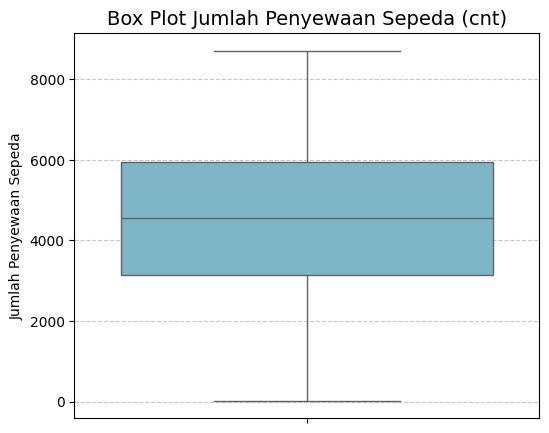

In [999]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=day_df["cnt"], color="#72BCD4")

plt.title("Box Plot Jumlah Penyewaan Sepeda (cnt)", fontsize=14)
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### Pertanyaan 1:

<ipython-input-1000-1c27ce61fc4b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="cnt", data=hourly_rentals, palette=colors, ax=ax)


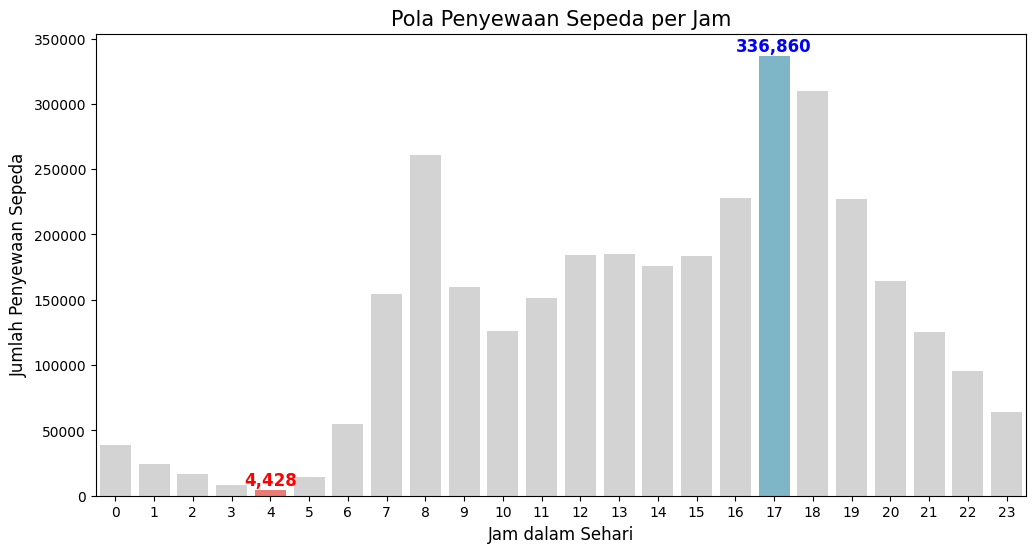

In [1000]:
# Membuat visualisasi
fig, ax = plt.subplots(figsize=(12, 6))

# Menentukan warna: puncak biru, terendah merah, lainnya abu-abu
colors = ["#D3D3D3"] * len(hourly_rentals)
colors[peak_hour.name] = "#72BCD4"  # Warna biru untuk puncak
colors[low_hour.name] = "#FF6961"  # Warna merah untuk terendah

sns.barplot(x="hr", y="cnt", data=hourly_rentals, palette=colors, ax=ax)

# Menyesuaikan label dan judul
ax.set_xlabel("Jam dalam Sehari", fontsize=12)
ax.set_ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
ax.set_title("Pola Penyewaan Sepeda per Jam", fontsize=15)
ax.set_xticks(range(24))  # Menampilkan semua jam 0-23

# Menampilkan nilai pada puncak dan terendah
ax.text(peak_hour["hr"], peak_hour["cnt"] + 500, f"{peak_hour['cnt']:,}",
        ha="center", va="bottom", fontsize=12, fontweight="bold", color="blue")
ax.text(low_hour["hr"], low_hour["cnt"] + 500, f"{low_hour['cnt']:,}",
        ha="center", va="bottom", fontsize=12, fontweight="bold", color="red")

# Menampilkan plot
plt.show()

- Tahun 2011: Jumlah penyewaan sepeda lebih rendah dibandingkan tahun 2012, yaitu berjumlah 1.243.103 orang
- Tahun 2012: Terjadi peningkatan jumlah penyewaan sepeda secara signifikan dibandingkan tahun sebelumnya, yaitu 2.049.576 orang

### Pertanyaan 2:

<ipython-input-1001-3aface35f6a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_per_season", y="season", data=season_rentals, palette=colors, ax=ax)


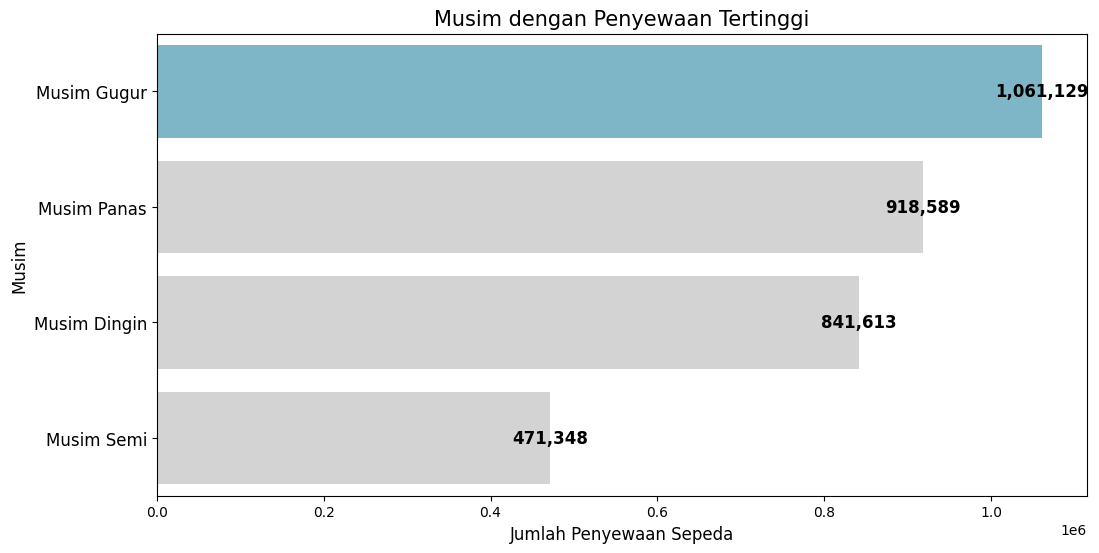

In [1001]:
fig, ax = plt.subplots(figsize=(12, 6))

colors = ["#72BCD4"] + ["#D3D3D3"] * (len(season_rentals) - 1)

sns.barplot(x="total_per_season", y="season", data=season_rentals, palette=colors, ax=ax)

# Menyesuaikan label dan judul
ax.set_ylabel("Musim", fontsize=12)
ax.set_xlabel("Jumlah Penyewaan Sepeda", fontsize=12)
ax.set_title("Musim dengan Penyewaan Tertinggi", loc="center", fontsize=15)
ax.tick_params(axis='y', labelsize=12)

# Menambahkan angka pada setiap batang
for index, row in season_rentals.iterrows():
    ax.text(row["total_per_season"], row["season"], f"{row['total_per_season']:,}",
            ha="center", va="center", fontsize=12, color="black", fontweight="bold")

# Menampilkan plot
plt.show()

Berdasarkan grafik tersebut, musim sangat berpengaruh terhadap permintaan penyewaan. Bisa dilihat pada grafik bahwa musim dengan tingkat penyewaan terbanyak adalah musim gugur, yaitu 1.061.129 orang yang dimana mungkin orang bisa banyak beraktivitas tanpa harus memikirkan cuaca. Sedangkan musim semi adalah musim dengan tingkat penyewaan terendah, yaitu sekitar 471.348 orang. Hal ini terjadi karena cuaca yang tidak stabil sehingga orang tidak membutuhkan sepeda untuk beraktivitas

Penyewaan berdasarkan cuaca

<ipython-input-1002-0df99a108724>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_by_weather", y="weathersit", data=weather_rentals, palette=colors, ax=ax)


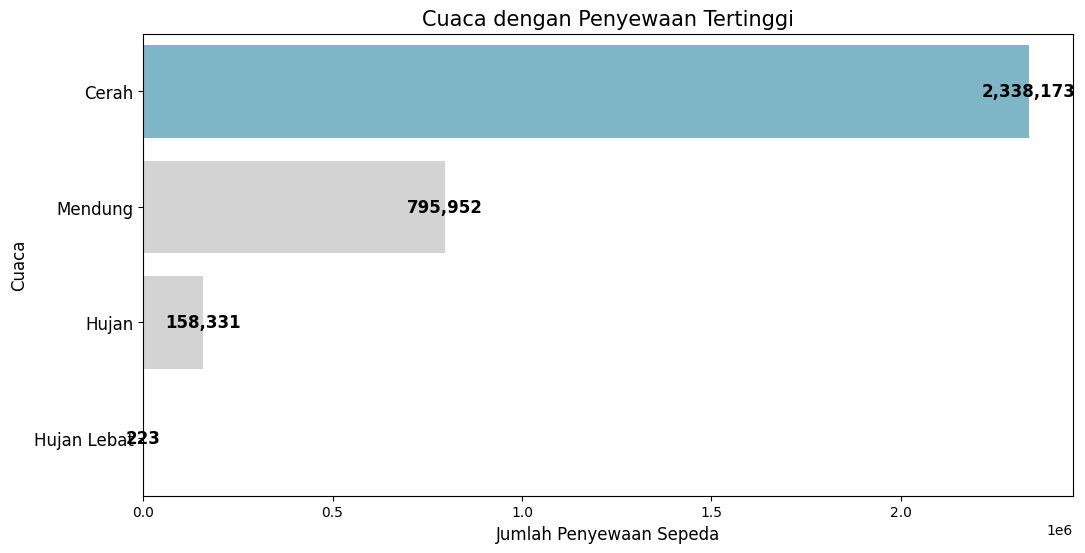

In [1002]:
fig, ax = plt.subplots(figsize=(12, 6))

colors = ["#72BCD4"] + ["#D3D3D3"] * (len(weather_rentals) - 1)

sns.barplot(x="total_by_weather", y="weathersit", data=weather_rentals, palette=colors, ax=ax)

# Menyesuaikan label dan judul
ax.set_ylabel("Cuaca", fontsize=12)
ax.set_xlabel("Jumlah Penyewaan Sepeda", fontsize=12)
ax.set_title("Cuaca dengan Penyewaan Tertinggi", loc="center", fontsize=15)
ax.tick_params(axis='y', labelsize=12)

# Menambahkan angka pada setiap batang
for index, row in weather_rentals.iterrows():
    ax.text(row["total_by_weather"], row["weathersit"], f"{row['total_by_weather']:,}",
            ha="center", va="center", fontsize=12, color="black", fontweight="bold")

# Menampilkan plot
plt.show()

<ipython-input-1003-a2a5f7a977a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="cnt", data=workingday_rentals, palette="Blues")


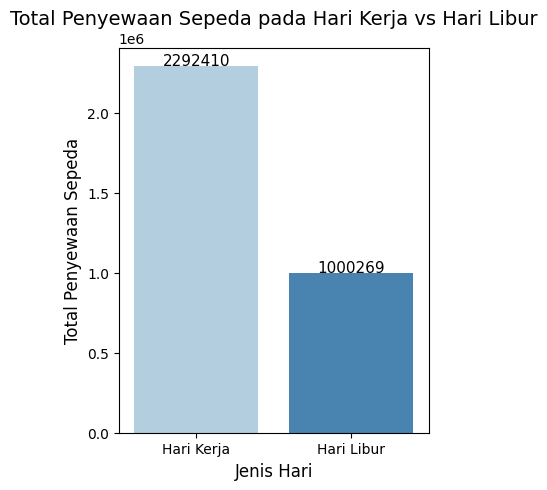

In [1003]:
plt.figure(figsize=(4, 5))
sns.barplot(x="workingday", y="cnt", data=workingday_rentals, palette="Blues")

plt.title("Total Penyewaan Sepeda pada Hari Kerja vs Hari Libur", fontsize=14)
plt.xlabel("Jenis Hari", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)

for index, value in enumerate(workingday_rentals["cnt"]):
    plt.text(index, value + 5000, str(value), ha="center", fontsize=11)

plt.show()

## Analisis Lanjutan (Opsional)

In [1004]:
def assign_cluster(row):
    if row["cnt"] > 1500 and row["weathersit"] == 1 and row["workingday"] == 1:
        return "High Rental - Workday - Clear Weather"
    elif 1000 <= row["cnt"] <= 1500 and row["weathersit"] == 2 and row["workingday"] == 1:
        return "Medium Rental - Workday - Misty Weather"
    elif row["cnt"] < 1000 and row["weathersit"] > 2 and row["workingday"] == 0:
        return "Low Rental - Holiday - Bad Weather"
    else:
        return "Other"

day_df["cluster"] = day_df.apply(assign_cluster, axis=1)

print(day_df[["dteday", "cnt", "weathersit", "workingday", "cluster"]].head())

      dteday   cnt  weathersit  workingday  \
0 2011-01-01   985           2           0   
1 2011-01-02   801           2           0   
2 2011-01-03  1349           1           1   
3 2011-01-04  1562           1           1   
4 2011-01-05  1600           1           1   

                                 cluster  
0                                  Other  
1                                  Other  
2                                  Other  
3  High Rental - Workday - Clear Weather  
4  High Rental - Workday - Clear Weather  


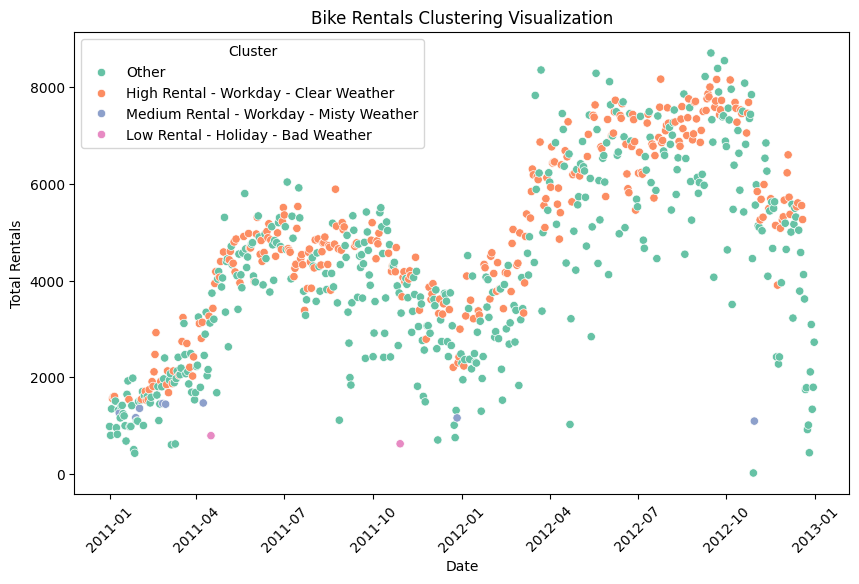

In [1005]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x="dteday", y="cnt", hue="cluster", palette="Set2")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Bike Rentals Clustering Visualization")
plt.legend(title="Cluster")
plt.show()

Grafik ini menunjukkan pola penyewaan sepeda berdasarkan tanggal dengan berbagai faktor seperti cuaca dan hari kerja. Terlihat bahwa jumlah penyewaan meningkat signifikan pada pertengahan tahun, terutama saat musim panas, dan menurun di awal serta akhir tahun. Hari kerja dengan cuaca cerah memiliki tingkat penyewaan tertinggi, sementara hari kerja dengan cuaca berkabut cenderung memiliki penyewaan menengah. Sebaliknya, penyewaan sepeda pada hari libur dengan cuaca buruk sangat rendah, menunjukkan bahwa orang lebih jarang menggunakan sepeda dalam kondisi tidak mendukung. Selain itu, terdapat data di luar kategori utama yang mencerminkan penyewaan pada kondisi campuran seperti hari libur dengan cuaca cerah atau hari kerja dengan penyewaan moderat. Pola ini mengindikasikan bahwa faktor utama yang mempengaruhi penyewaan adalah musim, cuaca, dan status hari kerja atau libur. Untuk meningkatkan penyewaan selama musim dingin atau cuaca buruk, strategi pemasaran seperti diskon atau promosi dapat diterapkan, sementara peningkatan jumlah sepeda selama musim panas dapat membantu memenuhi lonjakan permintaan.

## Conclusion

- Konklusi pertanyaan 1 <br>
Penyewaan sepeda mencapai puncaknya sekitar jam 17:00 (5 sore), kemungkinan besar karena bertepatan dengan waktu pulang kerja atau sekolah, sementara periode terendah terjadi sekitar jam 03:00 (3 pagi) ketika aktivitas masyarakat minim. Pola ini menunjukkan lonjakan signifikan pada pagi hari (sekitar jam 7-9) saat orang berangkat kerja/sekolah, diikuti penurunan di siang hari, dan puncak kembali pada sore hari (17:00 - 19:00). Untuk mengoptimalkan layanan, pengelola dapat memastikan ketersediaan sepeda lebih banyak pada jam sibuk, mengurangi jumlah sepeda di stasiun saat jam sepi, serta meningkatkan pemeliharaan sebelum jam-jam padat guna meningkatkan efisiensi penggunaan dan kepuasan pelanggan.
- Konklusi pertanyaan 2 <br>
Dapat diambil kesimpulan bahwa musim sangat berpengaruh terhadap permintaan penyewaan. Bisa dilihat pada grafik bahwa musim dengan tingkat penyewaan terbanyak adalah musim gugur, yaitu 1.061.129 orang yang dimana mungkin orang bisa banyak beraktivitas tanpa harus memikirkan cuaca. Sedangkan musim semi adalah musim dengan tingkat penyewaan terendah, yaitu sekitar 471.348 orang. Hal ini terjadi karena cuaca yang tidak stabil sehingga orang tidak membutuhkan sepeda untuk beraktivitas

In [1006]:
# Copy dataset agar tidak mengubah aslinya
df_copy = day_df.copy()
df_copy = hour_df.copy()

# Menghitung total penyewaan per hari
daily_rentals_df = hour_df.groupby("dteday", as_index=False)["cnt"].sum()
daily_rentals_df.rename(columns={"cnt": "total_rentals"}, inplace=True)

# Menghitung total penyewaan berdasarkan season
season_rentals = hour_df.groupby("season", as_index=False)["cnt"].sum()
season_rentals.columns = ["season", "total_per_season"]

# Menghitung total penyewaan berdasarkan kondisi cuaca
weather_rentals = hour_df.groupby("weathersit", as_index=False)["cnt"].sum()
weather_rentals.columns = ["weathersit", "total_by_weather"]

# Menghitung total penyewaan berdasarkan hari kerja
working_rentals = hour_df.groupby("workingday", as_index=False)["cnt"].sum()
working_rentals.columns = ["workingday", "total_by_working_day"]

# Menghitung total penyewaan per tahun
yearly_rentals_df = hour_df.groupby("yr", as_index=False)["cnt"].sum()
yearly_rentals_df.columns = ["yr", "total_rent_year"]
yearly_rentals_df["yr"] = yearly_rentals_df["yr"].map({0: "2011", 1: "2012"}).astype(str)

# Menggabungkan semua dataframe
all_df = df_copy.merge(daily_rentals_df, on="dteday", how="left")
all_df = all_df.merge(season_rentals, on="season", how="left")
all_df = all_df.merge(weather_rentals, on="weathersit", how="left")
all_df = all_df.merge(working_rentals, on="workingday", how="left")
all_df = all_df.merge(yearly_rentals_df, on="yr", how="left")

# Mengelompokkan data berdasarkan jam dan menghitung total penyewaan
hourly_rentals = hour_df.groupby("hr", as_index=False)["cnt"].sum()

# Menentukan jam dengan penyewaan tertinggi dan terendah
peak_hour = hourly_rentals.loc[hourly_rentals["cnt"].idxmax()]
low_hour = hourly_rentals.loc[hourly_rentals["cnt"].idxmin()]

# Pilih hanya kolom yang relevan
all_df = all_df[[
    "dteday", "total_per_season", "total_rentals", "yr", "workingday", "weathersit", "season",
    "total_by_weather", "total_by_working_day", "total_rent_year"
]]

# Simpan ke file CSV
all_df.to_csv("all_data.csv", index=False)